In [1]:
import pandas as pd

file_path = "C:/Users/USER/Documents/AI-ML/Student_Performance.csv"
df = pd.read_csv(file_path)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
df['Extracurricular Activities Flag'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

selected_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities Flag', 'Performance Index']

correlation = df[selected_columns].corr()
print(correlation)


                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Extracurricular Activities Flag        0.003873         0.008369    -0.023284   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Extracurricular Activities Flag                           0.013103   
Performance 

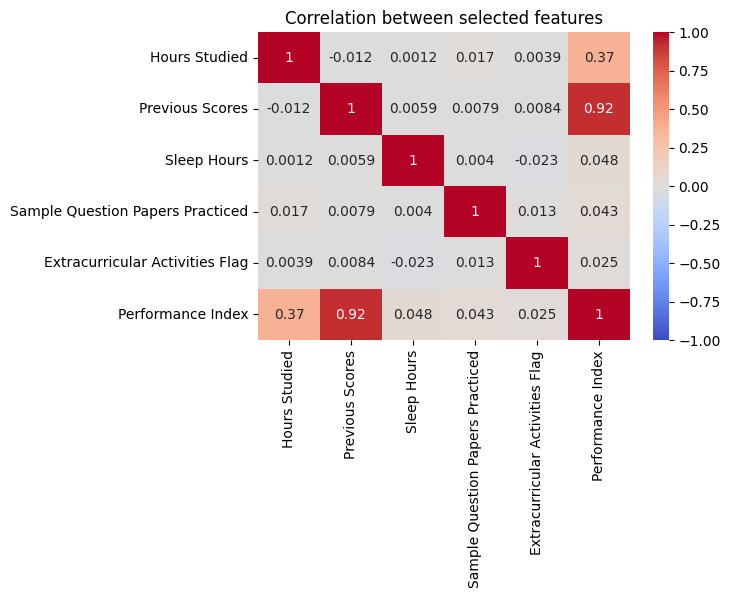

In [4]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between selected features")
plt.show()

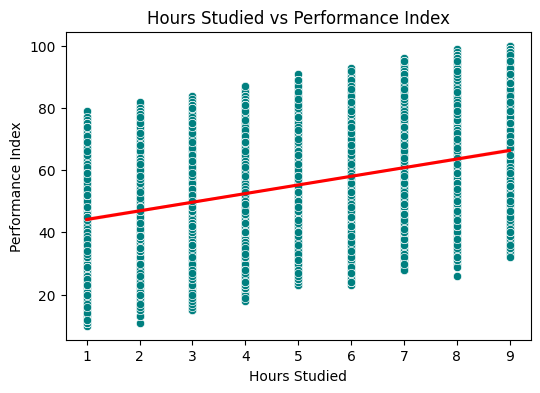

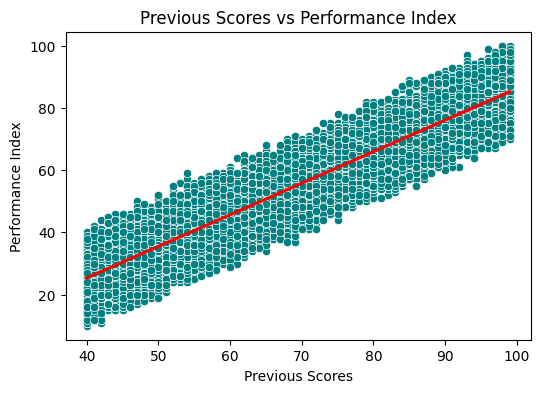

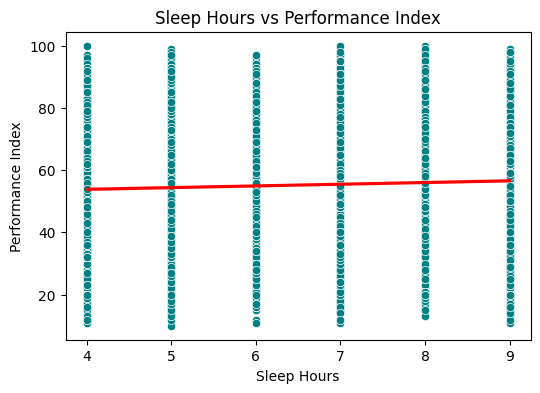

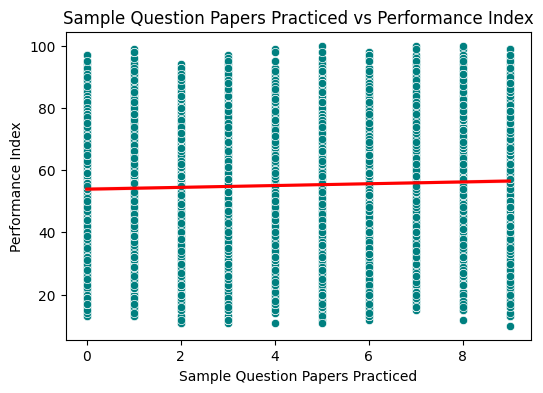

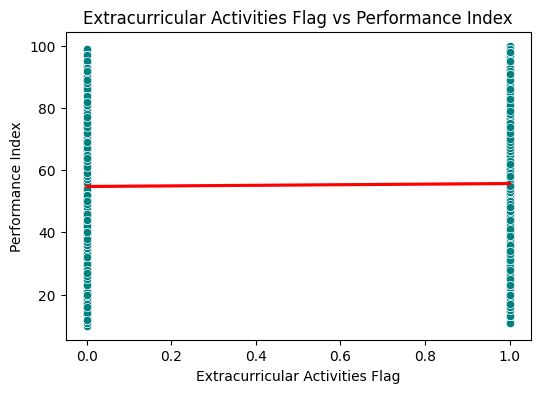

In [5]:
input_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Extracurricular Activities Flag"]
target = "Performance Index"

for feature in input_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y=target, color='teal')
    sns.regplot(data=df, x=feature, y=target, scatter=False, color='red')  # adds regression line
    plt.title(f"{feature} vs {target}")
    plt.show()

In [6]:
col = df.pop('Extracurricular Activities Flag')

# Insert it at position index 1 (2nd position)
df.insert(3, 'Extracurricular Activities Flag', col)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Extracurricular Activities Flag,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,1,9,1,91.0
1,4,82,No,0,4,2,65.0
2,8,51,Yes,1,7,2,45.0
3,5,52,Yes,1,5,2,36.0
4,7,75,No,0,8,5,66.0
...,...,...,...,...,...,...,...
9995,1,49,Yes,1,4,2,23.0
9996,7,64,Yes,1,8,5,58.0
9997,6,83,Yes,1,8,5,74.0
9998,9,97,Yes,1,7,0,95.0


In [7]:
from sklearn.model_selection import train_test_split

X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities Flag', 'Sleep Hours', 'Sample Question Papers Practiced']]

y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [24]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities Flag,Sleep Hours,Sample Question Papers Practiced
9254,0.006455,-1.183844,0,0.269888,0.134041
1561,-1.149747,-1.241506,1,0.269888,0.483562
1670,-1.149747,0.661318,0,0.269888,-0.914520
6087,-1.149747,-1.356828,0,-0.318906,-1.264041
6669,1.162658,-1.299167,0,1.447477,-1.613561
...,...,...,...,...,...
5734,1.162658,-1.126183,1,-0.318906,0.483562
5191,-0.378946,-0.088279,0,1.447477,-0.565000
5390,1.548059,-1.241506,0,0.269888,0.483562
860,-1.535148,-1.299167,0,1.447477,-1.613561


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_test_numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_train[X_train_numeric_cols] = scaler.fit_transform(X_train[X_train_numeric_cols])
X_test[X_test_numeric_cols] = scaler.transform(X_test[X_test_numeric_cols])

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 55.010462974864524
Coefficient: [ 7.40134079 17.63727127  0.60861668  0.81003107  0.54884171]


In [27]:
from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 4.082628398521845


In [29]:
actual_pred = X_test.copy()

actual_pred['Actual'] = y_test
actual_pred['Predicted'] = y_pred

In [35]:
actual_pred

,Hours Studied,Previous Scores,Extracurricular Activities Flag,Sleep Hours,Sample Question Papers Practiced,Actual,Predicted
6252,0.006455,-0.030618,0,0.858683,-0.914520,51.0,54.711854
4684,-1.149747,-1.356828,1,-1.496494,1.182603,20.0,22.615513
1731,0.777257,-0.780215,1,0.269888,0.134041,46.0,47.903145
4742,0.391856,-1.587474,1,0.858683,0.134041,28.0,31.289767
4521,0.777257,-0.953199,0,-1.496494,0.483562,41.0,43.004570
...,...,...,...,...,...,...,...
6412,-1.149747,0.027043,0,0.269888,-0.565000,45.0,46.886280
8285,-0.378946,0.545995,0,1.447477,-0.565000,66.0,62.698025
7853,-1.149747,-1.702796,1,0.269888,-0.914520,16.0,16.793420
1095,-0.764346,0.776640,0,0.269888,0.134041,65.0,63.343274


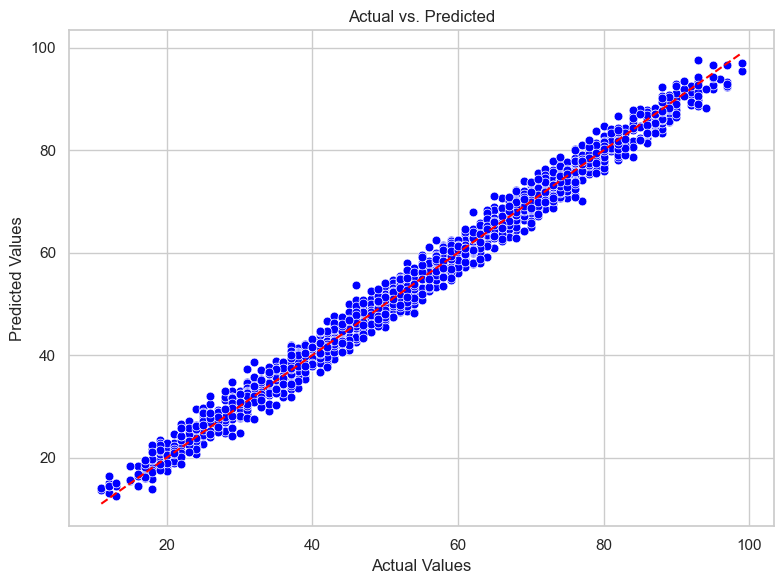

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set seaborn style for nicer plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=40)

# Plot a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.tight_layout()

# Show the plot
plt.show()
